In [1]:
import tensorflow as tf
import numpy as np
tf.enable_eager_execution()

c:\library\python\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\library\python\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\library\python\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\library\python\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)
mnist

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data\t10k-images-idx3-ubyte.gz
Extracting ./mnist/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001989B1B5F08>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001989986F548>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001989986F488>)

In [3]:
mnist.train.next_batch(1)

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

In [4]:
X = mnist.train.next_batch(1)[0]
y =  mnist.train.next_batch(1)[1]
X

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [5]:
X = mnist.train.next_batch(1)[0]
y =  mnist.train.next_batch(1)[1]
X

array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.      

In [6]:
initializer = tf.contrib.layers.xavier_initializer()

In [7]:
w0= tf.Variable(initializer([28 * 28, 200]))
w0

<tf.Variable 'Variable:0' shape=(784, 200) dtype=float32, numpy=
array([[-0.05854924,  0.0130202 ,  0.0481455 , ..., -0.01917328,
         0.03897668,  0.04424385],
       [ 0.06008689,  0.05185474,  0.00901419, ..., -0.03635934,
        -0.04955981,  0.02039467],
       [-0.03981236, -0.00495522,  0.05380914, ..., -0.03590338,
         0.06108926, -0.01019812],
       ...,
       [ 0.02410543,  0.01013574,  0.03594895, ..., -0.01501861,
         0.0193968 , -0.02492828],
       [-0.05039076,  0.0368012 ,  0.02831794, ..., -0.0024588 ,
         0.04603918, -0.03116807],
       [-0.04706585,  0.04666068,  0.01263095, ..., -0.04077959,
        -0.06068291, -0.02513408]], dtype=float32)>

In [8]:
b0= tf.Variable(initializer([200]))
b0

<tf.Variable 'Variable:0' shape=(200,) dtype=float32, numpy=
array([ 0.07009164, -0.07099259, -0.06404574,  0.02642057, -0.11628454,
       -0.01070123, -0.0473979 , -0.03416122,  0.02794681, -0.0767523 ,
        0.11406217, -0.04555724,  0.1155305 , -0.04969522,  0.02557386,
        0.02286758, -0.01587556, -0.10077325, -0.06947751,  0.02725593,
       -0.06879382, -0.09181075,  0.07396076, -0.00366334,  0.0519006 ,
       -0.07677417, -0.07626614, -0.07191569,  0.0527046 ,  0.07091173,
       -0.02535132, -0.00119052,  0.12185947, -0.03872272, -0.11967553,
        0.03866231,  0.06836428,  0.10687966, -0.03225097,  0.09403218,
        0.04854193,  0.02454296, -0.08055641,  0.02231736,  0.11000726,
       -0.0830612 ,  0.09854688, -0.04596663, -0.08852789, -0.02094039,
        0.08451814,  0.02586264,  0.10454945, -0.08235036,  0.01646549,
       -0.06901997,  0.10668451, -0.09985572,  0.05154074, -0.10377658,
       -0.12007455,  0.08735072,  0.03149302,  0.05533951,  0.04799528,
   

In [9]:
hypothesis0 = tf.sigmoid(tf.matmul(X, w0) + b0)
hypothesis0

Instructions for updating:
Colocations handled automatically by placer.


<tf.Tensor: id=36, shape=(1, 200), dtype=float32, numpy=
array([[0.5469355 , 0.40610817, 0.5926684 , 0.37586144, 0.49676695,
        0.41704094, 0.37223577, 0.59522504, 0.5438952 , 0.41404027,
        0.48973474, 0.5410652 , 0.5876598 , 0.4866988 , 0.5491607 ,
        0.5423762 , 0.4793022 , 0.255031  , 0.4509501 , 0.537093  ,
        0.52327645, 0.4150717 , 0.43476894, 0.5969852 , 0.53301567,
        0.4456281 , 0.52696294, 0.54191715, 0.42366347, 0.5738665 ,
        0.4828667 , 0.3086419 , 0.54397464, 0.42887318, 0.49224365,
        0.64814264, 0.37695718, 0.4373789 , 0.5323719 , 0.64625114,
        0.47842368, 0.52537817, 0.4550295 , 0.47609043, 0.53706616,
        0.32815623, 0.49458063, 0.50991964, 0.41232842, 0.4731126 ,
        0.72007334, 0.4158802 , 0.4964449 , 0.52528495, 0.4102436 ,
        0.5411272 , 0.3709665 , 0.53427833, 0.5171188 , 0.5037569 ,
        0.46021834, 0.5713578 , 0.5917618 , 0.49933517, 0.44683313,
        0.49506158, 0.62741506, 0.31778815, 0.46417233, 0.3

In [10]:
hypothesis0.shape

TensorShape([Dimension(1), Dimension(200)])

In [13]:
w1 = tf.Variable(initializer([200, 10]))
w1

<tf.Variable 'Variable:0' shape=(200, 10) dtype=float32, numpy=
array([[-0.00137979, -0.08791204,  0.08510426, ...,  0.05325246,
         0.02317634,  0.16117242],
       [ 0.08744249, -0.06156746, -0.06019726, ..., -0.15790649,
         0.08998072,  0.15251952],
       [-0.12616348,  0.04862066,  0.08279365, ..., -0.14650881,
         0.00401582, -0.07247839],
       ...,
       [ 0.0583788 ,  0.15255705,  0.006173  , ..., -0.06798356,
         0.06052539, -0.09652227],
       [ 0.0485895 ,  0.09937027, -0.09878424, ..., -0.01207153,
         0.01281293, -0.08383323],
       [-0.05048896, -0.0018567 , -0.1433723 , ..., -0.15271588,
        -0.03009333, -0.11329795]], dtype=float32)>

In [15]:
b1 = tf.Variable(initializer([10]))
b1

<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=
array([-0.17563161,  0.47605932,  0.346829  , -0.4892797 ,  0.41021407,
       -0.2875979 ,  0.01652151, -0.17044416, -0.04668546,  0.14198619],
      dtype=float32)>

In [16]:
hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1)
hypothesis1

<tf.Tensor: id=93, shape=(1, 10), dtype=float32, numpy=
array([[0.02364687, 0.2665504 , 0.11139836, 0.01843059, 0.19068691,
        0.09111846, 0.14450516, 0.03765663, 0.06612394, 0.04988275]],
      dtype=float32)>

In [17]:
mnist.train.num_examples

55000

In [18]:
batch_size = 100

In [22]:
total_batch = mnist.train.num_examples//batch_size
total_batch

550

In [23]:
optimizer = tf.train.AdamOptimizer(0.001)

In [24]:
global_step = tf.train.create_global_step()
global_step

<tf.Variable 'global_step:0' shape=() dtype=int64, numpy=0>

In [28]:
for step in range(11):
    total_cost = 0
    for i in range(total_batch):
        X, y = mnist.train.next_batch(batch_size)
#         print(f"i step : {i}, X.shape : {X.shape}, y.shape : {y.shape}")
#         print("=" * 40)
        with tf.GradientTape() as tape:
            hypothesis0 = tf.sigmoid(tf.matmul(X, w0) + b0)
            hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1)
            cost = -tf.reduce_sum( y * tf.log(hypothesis1)) / len(y)
            
            grads = tape.gradient(cost, [w0, w1, b0, b1])
            
        optimizer.apply_gradients(grads_and_vars=zip(grads, [w0, w1, b0, b1]))
        total_cost += cost
    print(f"step : {step+1}, cost : {total_cost / total_batch}")
    

step : 0, cost : 0.22923679649829865
step : 1, cost : 0.18373143672943115
step : 2, cost : 0.14771856367588043
step : 3, cost : 0.12663355469703674
step : 4, cost : 0.10872317850589752
step : 5, cost : 0.09332232922315598
step : 6, cost : 0.08131682872772217
step : 7, cost : 0.07160665094852448
step : 8, cost : 0.06167055293917656
step : 9, cost : 0.05406499654054642
step : 10, cost : 0.04774509370326996


In [29]:
test_images = mnist.test.images
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
test_images.shape

(10000, 784)

In [33]:
test_labels = mnist.test.labels
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
hypothesis0 = tf.sigmoid(tf.matmul(test_images, w0) + b0)
hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1)
pred = tf.argmax(hypothesis1, 1)
pred

<tf.Tensor: id=585176, shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6], dtype=int64)>

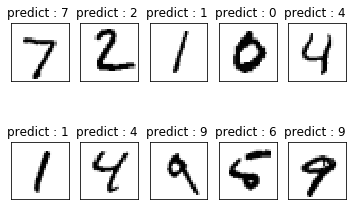

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    
    subplot.set_xticks([])
    subplot.set_yticks([])
    
    subplot.set_title(f'predict : {pred[i]} ')
    
    subplot.imshow(test_images[i].reshape((28, 28)),
                  cmap = plt.cm.gray_r)
    
plt.show()